In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('test_main.csv')
#print(data)

data.fillna(0, inplace=True)

# Now, the NaN values are replaced with 0
print(data)

years = data['Year'].unique()
companies = data['Company'].unique()
ratings = ['-2', '-1', '0', '1', '2']

# Initialize the 3D array with zeros
three_d_array = np.zeros((len(companies), len(years), len(ratings)))

# Fill the 3D array with data
for i, company in enumerate(companies):
    for j, year in enumerate(years):
        for k, rating in enumerate(ratings):
            subset = data[(data['Company'] == company) & (data['Year'] == year)]
            if not subset.empty:
                count = subset[rating].values[0]
                three_d_array[i, j, k] = count

# Check the shape of the 3D array
print(three_d_array.shape)
print(three_d_array)

print(companies)

                                       Company  -2  -1     0     1    2  Year
0  National Association of Manufacturers (NAM)   8  16  16.0   9.0  1.0  2021
1                       US Chamber of Commerce  24  34  21.0  14.0  1.0  2021
2  Western States Petroleum Association (WSPA)  17   9   5.0  14.0  0.0  2021
3  National Association of Manufacturers (NAM)   8  16  11.0   1.0  2.0  2022
4                       US Chamber of Commerce  40  34   8.0   9.0  3.0  2022
5  Western States Petroleum Association (WSPA)  12   8   0.0   0.0  0.0  2022
6  National Association of Manufacturers (NAM)  18  25  14.0   2.0  1.0  2023
7                       US Chamber of Commerce  32  16  12.0   6.0  0.0  2023
8  Western States Petroleum Association (WSPA)  10   8   6.0   0.0  0.0  2023
(3, 3, 5)
[[[ 8. 16. 16.  9.  1.]
  [ 8. 16. 11.  1.  2.]
  [18. 25. 14.  2.  1.]]

 [[24. 34. 21. 14.  1.]
  [40. 34.  8.  9.  3.]
  [32. 16. 12.  6.  0.]]

 [[17.  9.  5. 14.  0.]
  [12.  8.  0.  0.  0.]
  [10.  8.  6.

In [29]:
# Create a dictionary to store the data
data_dict = {}

# Fill the dictionary with data
for i, company in enumerate(companies):
    company_data = {}
    for j, year in enumerate(years):
        year_data = {}
        for k, rating in enumerate(ratings):
            count = three_d_array[i, j, k]
            year_data[rating] = count
        company_data[year] = year_data
    data_dict[company.strip()] = company_data

# Now you can access the data for a specific company and year like this:
company_name = "National Association of Manufacturers (NAM)"
year = 2021
try:
    result = data_dict[company_name.strip()][year]
    print(result)
except KeyError:
    print(f"No data found for '{company_name}' in {year}")


print(data_dict)

{'-2': 8.0, '-1': 16.0, '0': 16.0, '1': 9.0, '2': 1.0}
{'National Association of Manufacturers (NAM)': {2021: {'-2': 8.0, '-1': 16.0, '0': 16.0, '1': 9.0, '2': 1.0}, 2022: {'-2': 8.0, '-1': 16.0, '0': 11.0, '1': 1.0, '2': 2.0}, 2023: {'-2': 18.0, '-1': 25.0, '0': 14.0, '1': 2.0, '2': 1.0}}, 'US Chamber of Commerce': {2021: {'-2': 24.0, '-1': 34.0, '0': 21.0, '1': 14.0, '2': 1.0}, 2022: {'-2': 40.0, '-1': 34.0, '0': 8.0, '1': 9.0, '2': 3.0}, 2023: {'-2': 32.0, '-1': 16.0, '0': 12.0, '1': 6.0, '2': 0.0}}, 'Western States Petroleum Association (WSPA)': {2021: {'-2': 17.0, '-1': 9.0, '0': 5.0, '1': 14.0, '2': 0.0}, 2022: {'-2': 12.0, '-1': 8.0, '0': 0.0, '1': 0.0, '2': 0.0}, 2023: {'-2': 10.0, '-1': 8.0, '0': 6.0, '1': 0.0, '2': 0.0}}}


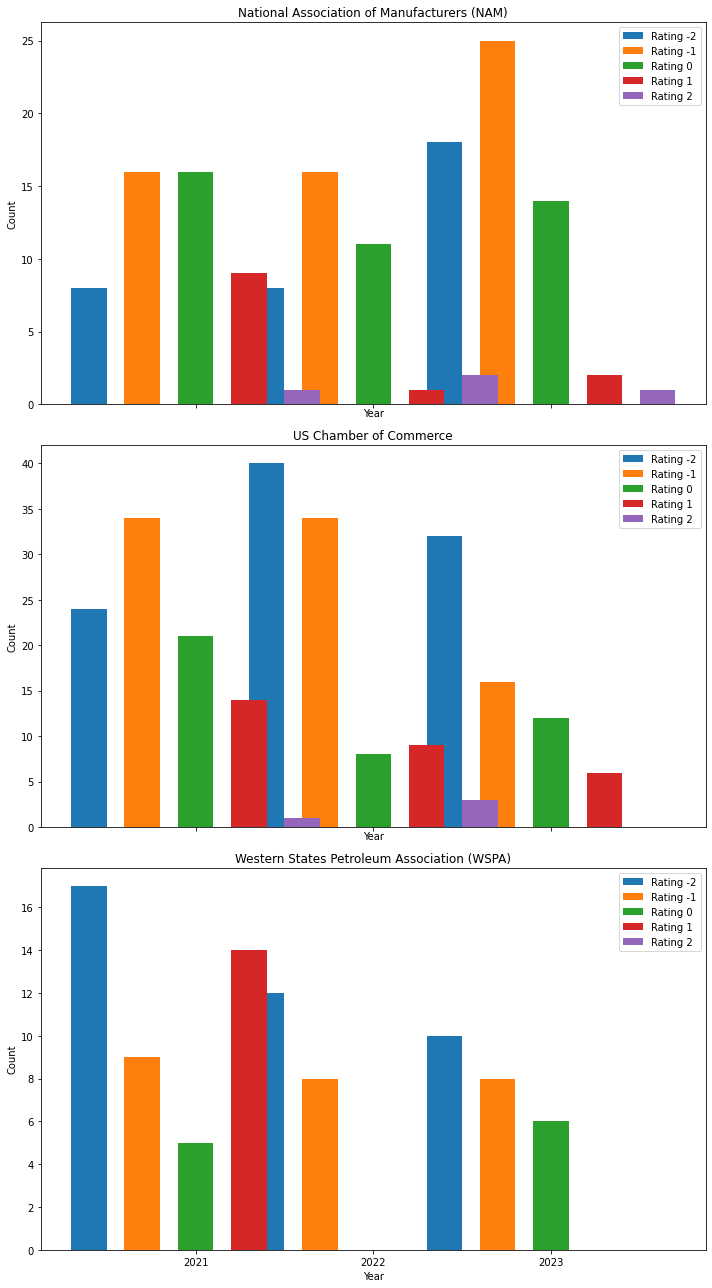

In [30]:
# Extract unique years and ratings
years = sorted(set(year for company_data in data_dict.values() for year in company_data.keys()))
ratings = ['-2', '-1', '0', '1', '2']

# Create subplots for each company
num_companies = len(data_dict)
fig, axes = plt.subplots(num_companies, 1, figsize=(10, 6 * num_companies), sharex=True)

# Set bar width and spacing
bar_width = 0.2
spacing = 0.1

# Create a list of x positions for bars
x_positions = np.arange(len(years))

# Iterate through companies and plot data
for i, (company, company_data) in enumerate(data_dict.items()):
    ax = axes[i]
    ax.set_title(company)

    # Iterate through ratings and plot bars for each year
    for j, rating in enumerate(ratings):
        counts = [company_data[year][rating] for year in years]
        x_offset = (bar_width + spacing) * (j - 2)  # Offset bars for different ratings
        ax.bar(x_positions + x_offset, counts, width=bar_width, label=f'Rating {rating}')

    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years)
    ax.legend()

plt.tight_layout()
plt.show()

Correct the Spacing

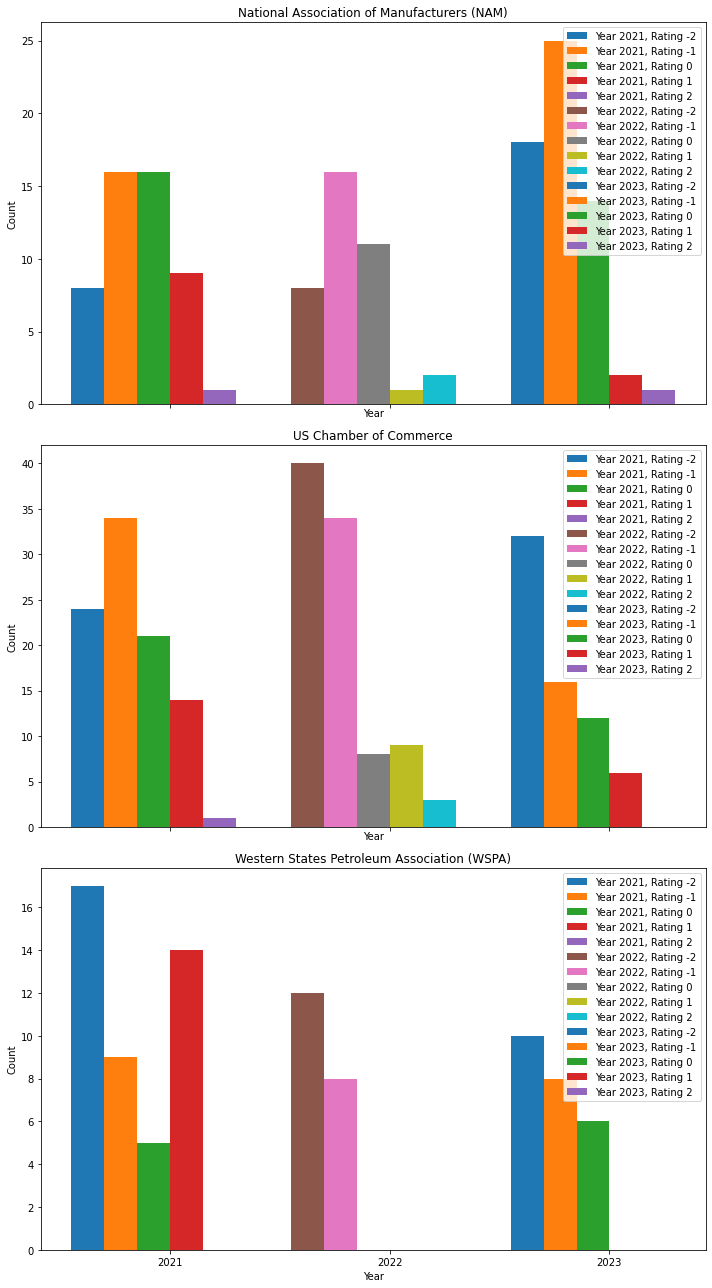

In [31]:
# Extract unique years and ratings
years = sorted(set(year for company_data in data_dict.values() for year in company_data.keys()))
ratings = ['-2', '-1', '0', '1', '2']

# Create subplots for each company
num_companies = len(data_dict)
fig, axes = plt.subplots(num_companies, 1, figsize=(10, 6 * num_companies), sharex=True)

# Set bar width
bar_width = 0.15

# Create a list of x positions for bars
x_positions = np.arange(len(years))

# Iterate through companies and plot data
for i, (company, company_data) in enumerate(data_dict.items()):
    ax = axes[i]
    ax.set_title(company)

    # Iterate through years and ratings and plot bars
    for j, year in enumerate(years):
        for k, rating in enumerate(ratings):
            counts = company_data[year][rating]
            x = x_positions[j] + k * bar_width - (bar_width * len(ratings) / 2)
            ax.bar(x, counts, width=bar_width, label=f'Year {year}, Rating {rating}')

    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years)
    ax.legend()

plt.tight_layout()
plt.show()

Adjust Legend

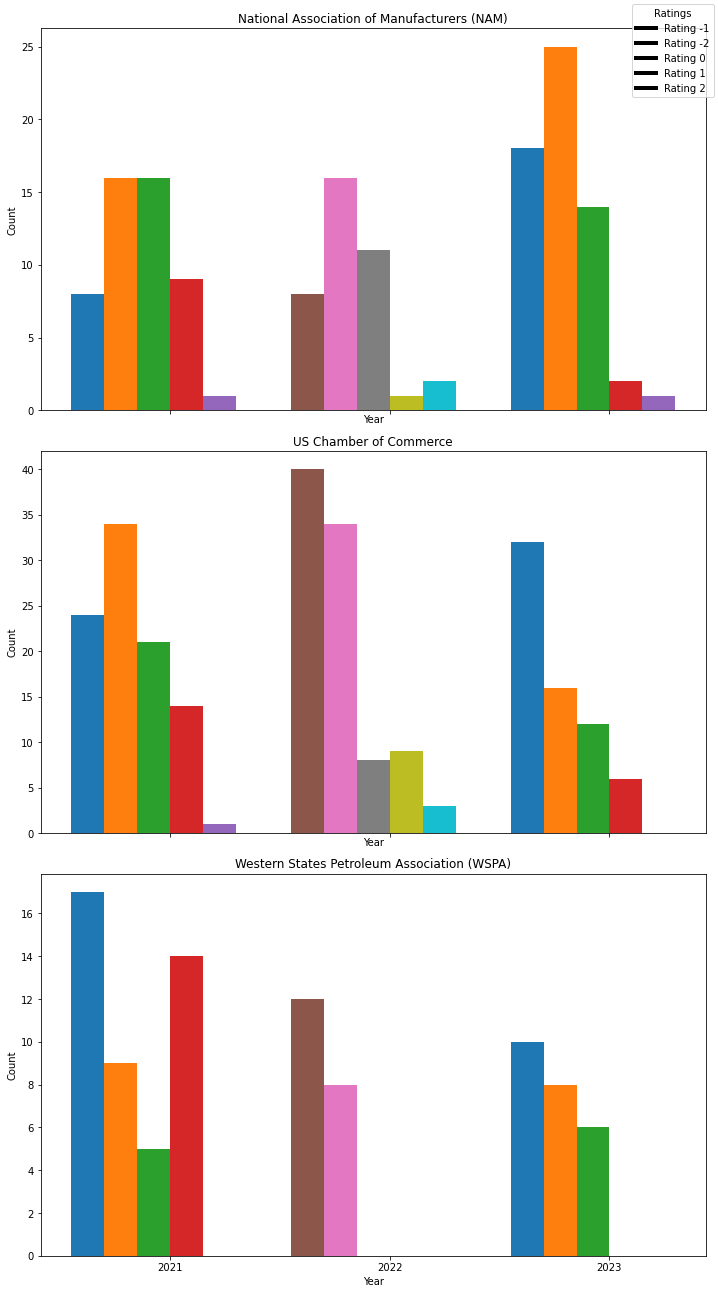

In [32]:
# Extract unique years and ratings
years = sorted(set(year for company_data in data_dict.values() for year in company_data.keys()))
ratings = ['-2', '-1', '0', '1', '2']

# Create subplots for each company
num_companies = len(data_dict)
fig, axes = plt.subplots(num_companies, 1, figsize=(10, 6 * num_companies), sharex=True)

# Set bar width
bar_width = 0.15

# Create a list of x positions for bars
x_positions = np.arange(len(years))

# Initialize a set for legend labels to ensure uniqueness
legend_labels = set()

# Iterate through companies and plot data
for i, (company, company_data) in enumerate(data_dict.items()):
    ax = axes[i]
    ax.set_title(company)

    # Iterate through years and ratings and plot bars
    for j, year in enumerate(years):
        for k, rating in enumerate(ratings):
            counts = company_data[year][rating]
            x = x_positions[j] + k * bar_width - (bar_width * len(ratings) / 2)
            ax.bar(x, counts, width=bar_width, label=f'Year {year}, Rating {rating}')

    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years)

    # Add each rating label to the set
    for rating in ratings:
        legend_labels.add(f'Rating {rating}')

# Create a common legend outside of the subplots with unique rating labels
fig.legend(handles=[plt.Line2D([0], [0], color='black', lw=4, label=label) for label in sorted(legend_labels)],
           loc='upper right', title='Ratings')

plt.tight_layout()
plt.show()

Fix colors

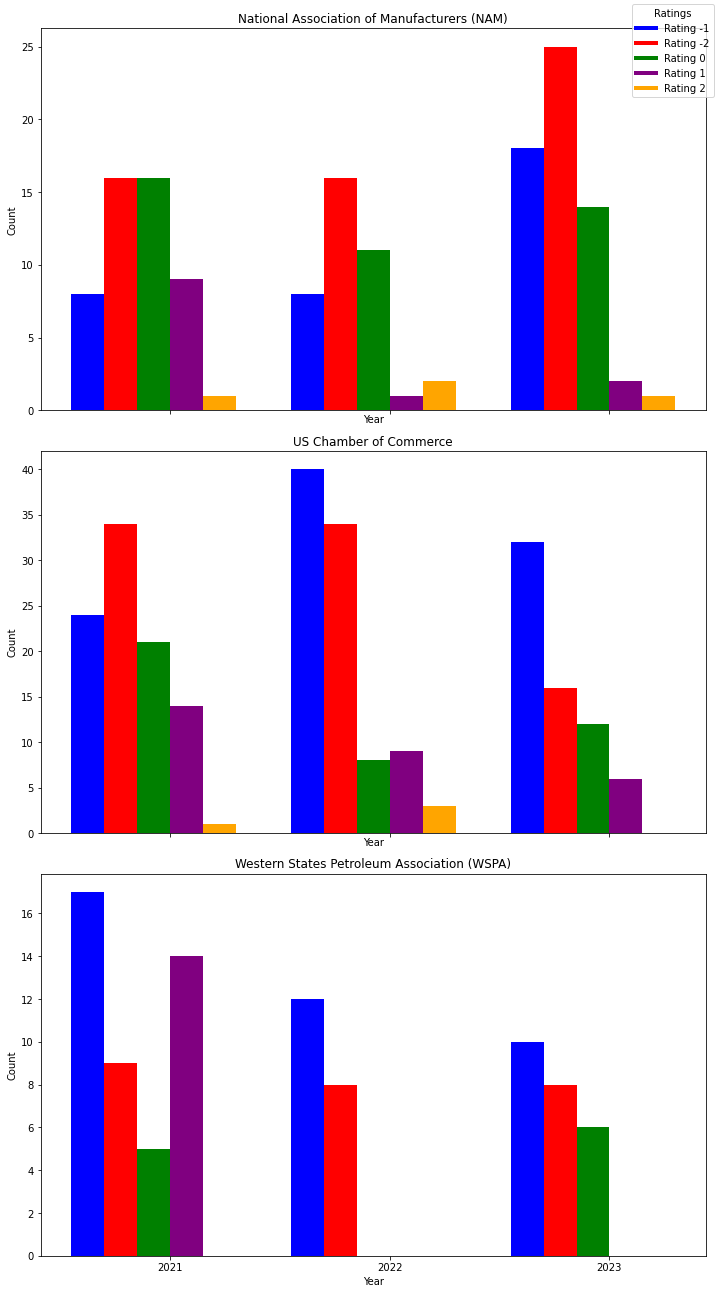

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Your data dictionary

# Extract unique years and ratings
years = sorted(set(year for company_data in data_dict.values() for year in company_data.keys()))
ratings = ['-2', '-1', '0', '1', '2']

# Create subplots for each company
num_companies = len(data_dict)
fig, axes = plt.subplots(num_companies, 1, figsize=(10, 6 * num_companies), sharex=True)

# Set bar width
bar_width = 0.15

# Create a list of x positions for bars
x_positions = np.arange(len(years))

# Define custom colors for each rating
rating_colors = {'-2': 'blue', '-1': 'red', '0': 'green', '1': 'purple', '2': 'orange'}

# Initialize a set for legend labels to ensure uniqueness
legend_labels = set()

# Iterate through companies and plot data
for i, (company, company_data) in enumerate(data_dict.items()):
    ax = axes[i]
    ax.set_title(company)

    # Iterate through years and ratings and plot bars
    for j, year in enumerate(years):
        for k, rating in enumerate(ratings):
            counts = company_data[year][rating]
            x = x_positions[j] + k * bar_width - (bar_width * len(ratings) / 2)
            ax.bar(x, counts, width=bar_width, label=f'Year {year}, Rating {rating}', color=rating_colors[rating])

    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years)

    # Add each rating label to the set
    for rating in ratings:
        legend_labels.add(f'Rating {rating}')

# Create a common legend outside of the subplots with unique rating labels and custom colors
handles = [plt.Line2D([0], [0], color=rating_colors[rating], lw=4, label=f'Rating {rating}') for rating in ratings]
fig.legend(handles=handles, labels=sorted(legend_labels), title='Ratings', loc='upper right')

plt.tight_layout()
plt.show()

# Hex colour pallette = [-2 = db491d, -1 = 967748, 0 = c5c9c7 , 1 = 14d4de, 2 = 48bd75]

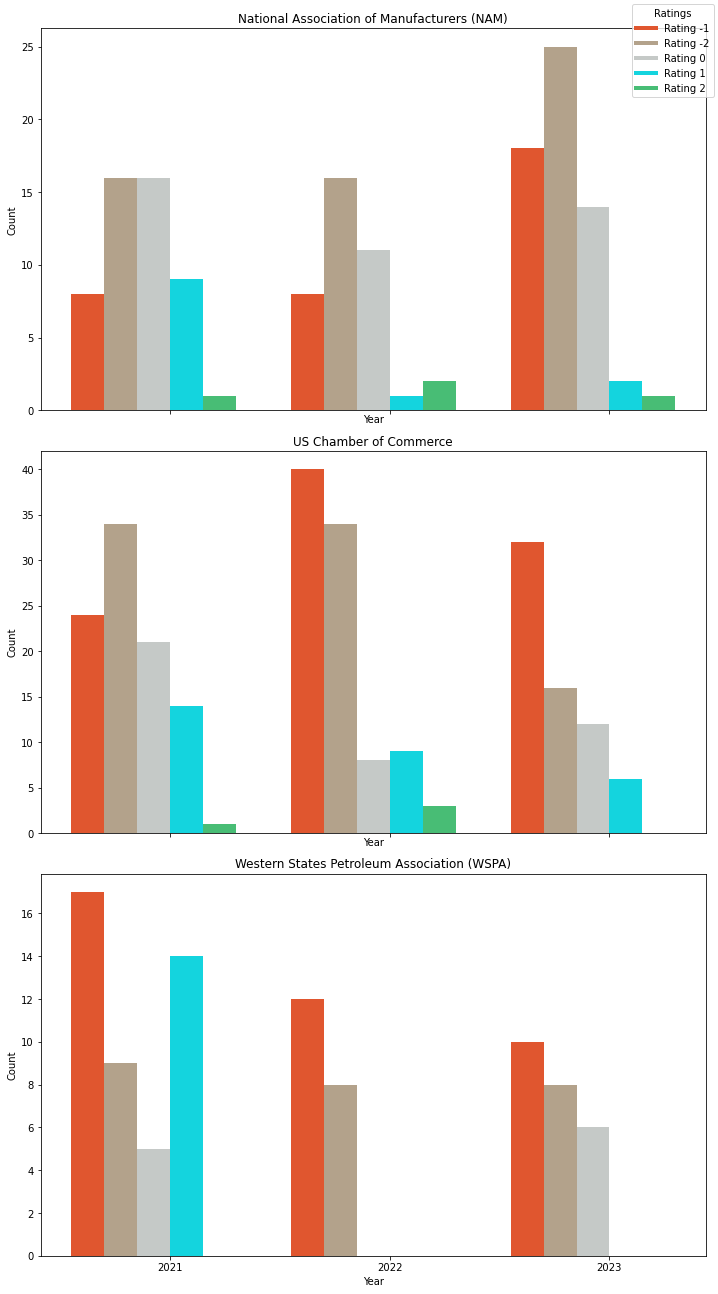

In [34]:
# Extract unique years and ratings
years = sorted(set(year for company_data in data_dict.values() for year in company_data.keys()))
ratings = ['-2', '-1', '0', '1', '2']

# Create subplots for each company
num_companies = len(data_dict)
fig, axes = plt.subplots(num_companies, 1, figsize=(10, 6 * num_companies), sharex=True)

# Set bar width
bar_width = 0.15

# Create a list of x positions for bars
x_positions = np.arange(len(years))

# Define custom colors for each rating
rating_colors = {
    '-2': '#e0562f', '-1': '#b3a28b', '0': '#c5c9c7',
    '1': '#14d4de', '2': '#48bd75'
}

# Initialize a set for legend labels to ensure uniqueness
legend_labels = set()

# Iterate through companies and plot data
for i, (company, company_data) in enumerate(data_dict.items()):
    ax = axes[i]
    ax.set_title(company)

    # Iterate through years and ratings and plot bars
    for j, year in enumerate(years):
        for k, rating in enumerate(ratings):
            counts = company_data[year][rating]
            x = x_positions[j] + k * bar_width - (bar_width * len(ratings) / 2)
            ax.bar(x, counts, width=bar_width, label=f'Year {year}, Rating {rating}', color=rating_colors[rating])

    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years)

    # Add each rating label to the set
    for rating in ratings:
        legend_labels.add(f'Rating {rating}')

# Create a common legend outside of the subplots with unique rating labels and custom colors
handles = [plt.Line2D([0], [0], color=rating_colors[rating], lw=4, label=f'Rating {rating}') for rating in ratings]
fig.legend(handles=handles, labels=sorted(legend_labels), title='Ratings', loc='upper right')

plt.tight_layout()
plt.show()

Make it pretty

In [1]:
import mplcursors

# Extract unique years and ratings
years = sorted(set(year for company_data in data_dict.values() for year in company_data.keys()))
ratings = ['-2', '-1', '0', '1', '2']

# Create subplots for each company
num_companies = len(data_dict)
fig, axes = plt.subplots(num_companies, 1, figsize=(10, 6 * num_companies), sharex=True)

# Set bar width
bar_width = 0.15

# Create a list of x positions for bars
x_positions = np.arange(len(years))

# Define custom colors for each rating
rating_colors = {
    '-2': '#e0562f', '-1': '#b3a28b', '0': '#c5c9c7',
    '1': '#14d4de', '2': '#48bd75'
}

# Initialize a set for legend labels to ensure uniqueness
legend_labels = set()

# Iterate through companies and plot data
for i, (company, company_data) in enumerate(data_dict.items()):
    ax = axes[i]
    ax.set_title(company)

    # Iterate through years and ratings and plot bars
    for j, year in enumerate(years):
        for k, rating in enumerate(ratings):
            counts = company_data[year][rating]
            x = x_positions[j] + k * bar_width - (bar_width * len(ratings) / 2)
            ax.bar(x, counts, width=bar_width, label=f'Year {year}, Rating {rating}', color=rating_colors[rating])

    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years)

    # Add each rating label to the set
    for rating in ratings:
        legend_labels.add(f'Rating {rating}')


# Iterate through companies and plot data
for i, (company, company_data) in enumerate(data_dict.items()):
    ax = axes[i]
    ax.set_title(company)

    # Iterate through years and ratings and plot bars
    for j, year in enumerate(years):
        for k, rating in enumerate(ratings):
            counts = company_data[year][rating]
            x = x_positions[j] + k * bar_width - (bar_width * len(ratings) / 2)
            bar = ax.bar(x, counts, width=bar_width, label=f'Year {year}, Rating {rating}', color=rating_colors[rating])

            # Use mplcursors to display count values on hover
            mplcursors.cursor(bar, hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Count: {int(sel.target.get_height())}"))


# Create a common legend outside of the subplots with unique rating labels and custom colors
handles = [plt.Line2D([0], [0], color=rating_colors[rating], lw=4, label=f'Rating {rating}') for rating in ratings]
#fig.legend(handles=handles, labels=sorted(legend_labels), title='Ratings', loc='upper right')

# Add a common title to the entire figure
fig.suptitle('Rating Trends by Company and Year', fontsize=16)

# Set background color for subplots
for ax in axes:
    ax.set_facecolor('#f5f5f5')  # Light gray background

# Add borders around subplots
for ax in axes:
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

# Increase font size for axis labels and tick labels
for ax in axes:
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)

# Adjust Y-axis limits if needed
# for ax in axes:
#     ax.set_ylim(0, max_count + 100)  # Adjust the maximum Y-axis limit as needed

# Add gridlines to subplots
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Add data point labels (values on top of bars)
# for ax in axes:
#     for p in ax.patches:
#         ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha='center', va='center', fontsize=10, color='black')

# Adjust legend position and size
fig.legend(handles=handles, labels=sorted(legend_labels), title='Ratings', loc='upper right', fontsize=12)

# Adjust spacing between subplots and ensure they fit in the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Set a background color for the entire figure (if desired)
# fig.set_facecolor('#ffffff')  # White background

# Show the improved plot
plt.show()

ModuleNotFoundError: No module named 'mplcursors'